https://www.kaggle.com/code/ahammadmejbah/comprehensive-analysis-for-major-roads-australia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import networkx as nx
import squarify 
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import TensorBoard
import time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import holoviews as hv
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from holoviews import opts
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from itertools import combinations
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

pandas : data manipulation library in Python

matplotlib.pyplot : visualizations

    seaborn : data visualization library based on matplotlib

Counter (from collections):keeps track of how many times equivalent values are added.

networkx : creation, manipulation, and study of complex networks or graphs.

squarify : treemap visualizations

plotly.graph_objects : graphing library

plotly.express : creating figures with plotly.

holoviews : complex visualizations

sklearn.feature_extraction.text.CountVectorizer : convert a collection of text documents into a matrix of token counts.

itertools.islice : A function for slicing an iterable.

sklearn.feature_extraction.text.TfidfVectorizer : convert a collection of raw documents to a matrix of TF-IDF features.

sklearn.cluster.KMeans :partition observations into k clusters.

itertools.combinations :returns all possible combinations of a given iterable.

numpy : Alibrary for numerical computing

wordcloud : generating word clouds from text data.

warnings : control warning messages.

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\GitHub\geo-things\Major Roads\MajorRoads.csv", low_memory=False)
df.head()

,OBJECTID,road_id,contributor_id,jurisdiction_control,operator,date_created,date_modified,national_route,state_route,full_street_name,...,one_way,status,surface,trafficability,travel_direction,speed,state,source,horizontal_accuracy,Shape__Length
0,1,rdsf624d0a6c7a7,{8605DB96-3D31-4A43-9448-94F434C2EB97},Main Roads Western Australia,NaN,8/25/2023 12:00:00 AM,NaN,NaN,NaN,MITCHELL FREEWAY,...,ONE WAY,OPERATIONAL,SEALED,2WD,FROM TO,NaN,WA,WA,10.0,0.006770
1,2,rds60f2475ddf18,515471528,Transport for New South Wales (controlled roads),NaN,8/25/2023 12:00:00 AM,NaN,A3,NaN,MONA VALE ROAD,...,NaN,OPERATIONAL,SEALED,2WD,NaN,60.0,NSW,NSW,5.0,0.000901
2,3,rds96778e7514ca,19214997,NaN,NaN,2/20/2023 12:00:00 AM,4/20/2023 12:00:00 AM,NaN,NaN,MOUNTAIN HIGHWAY,...,TWO WAY,OPERATIONAL,SEALED,2WD,BOTH,50.0,VIC,VIC,1.0,0.000750
3,4,rds1fd952fdd9d5,{4882EB31-25B9-4C82-BCC8-95B6715175A2},Local Government Authority,NaN,8/25/2023 12:00:00 AM,NaN,NaN,NaN,KARGOTICH ROAD,...,NaN,OPERATIONAL,SEALED,2WD,NaN,100.0,WA,WA,10.0,0.000444
4,5,rds950dd7f156cf,18707795,NaN,NaN,2/20/2023 12:00:00 AM,4/20/2023 12:00:00 AM,A1,NaN,WILLIS STREET,...,ONE WAY,OPERATIONAL,SEALED,2WD,FROM TO,60.0,VIC,VIC,NaN,0.000550


In [3]:
df.drop_duplicates(inplace=True) # drop duplicates
df.dropna(subset=['road_id', 'full_street_name', 'status'], inplace=True) # drop rows with missing values (NaN)

In [4]:
if 'date_created' in df.columns:
    df['date_created'] = pd.to_datetime(df['date_created'], errors='coerce')
if 'date_modified' in df.columns:
    df['date_modified'] = pd.to_datetime(df['date_modified'], errors='coerce')
#converts the values in these columns to datetime objects 

In [5]:
print(df.info())
print("\n---------------------\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 498150 entries, 0 to 516826
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   OBJECTID              498150 non-null  int64         
 1   road_id               498150 non-null  object        
 2   contributor_id        498150 non-null  object        
 3   jurisdiction_control  227964 non-null  object        
 4   operator              256 non-null     object        
 5   date_created          498150 non-null  datetime64[ns]
 6   date_modified         474280 non-null  datetime64[ns]
 7   national_route        73266 non-null   object        
 8   state_route           133924 non-null  object        
 9   full_street_name      498150 non-null  object        
 10  street_name           498150 non-null  object        
 11  street_name_label     498150 non-null  object        
 12  street_type           490040 non-null  object        
 13  stre

,OBJECTID,road_id,contributor_id,jurisdiction_control,operator,date_created,date_modified,national_route,state_route,full_street_name,...,one_way,status,surface,trafficability,travel_direction,speed,state,source,horizontal_accuracy,Shape__Length
0,1,rdsf624d0a6c7a7,{8605DB96-3D31-4A43-9448-94F434C2EB97},Main Roads Western Australia,NaN,2023-08-25,NaT,NaN,NaN,MITCHELL FREEWAY,...,ONE WAY,OPERATIONAL,SEALED,2WD,FROM TO,NaN,WA,WA,10.0,0.006770
1,2,rds60f2475ddf18,515471528,Transport for New South Wales (controlled roads),NaN,2023-08-25,NaT,A3,NaN,MONA VALE ROAD,...,NaN,OPERATIONAL,SEALED,2WD,NaN,60.0,NSW,NSW,5.0,0.000901
2,3,rds96778e7514ca,19214997,NaN,NaN,2023-02-20,2023-04-20,NaN,NaN,MOUNTAIN HIGHWAY,...,TWO WAY,OPERATIONAL,SEALED,2WD,BOTH,50.0,VIC,VIC,1.0,0.000750
3,4,rds1fd952fdd9d5,{4882EB31-25B9-4C82-BCC8-95B6715175A2},Local Government Authority,NaN,2023-08-25,NaT,NaN,NaN,KARGOTICH ROAD,...,NaN,OPERATIONAL,SEALED,2WD,NaN,100.0,WA,WA,10.0,0.000444
4,5,rds950dd7f156cf,18707795,NaN,NaN,2023-02-20,2023-04-20,A1,NaN,WILLIS STREET,...,ONE WAY,OPERATIONAL,SEALED,2WD,FROM TO,60.0,VIC,VIC,NaN,0.000550


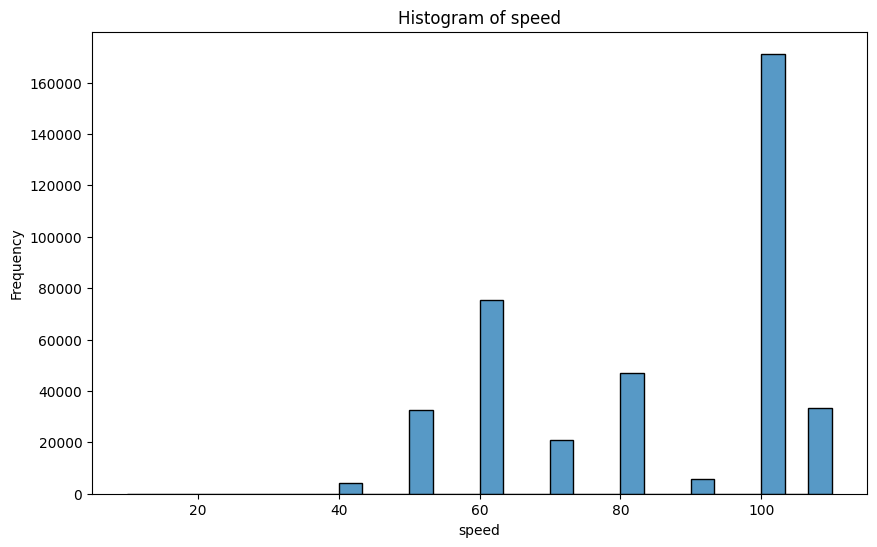

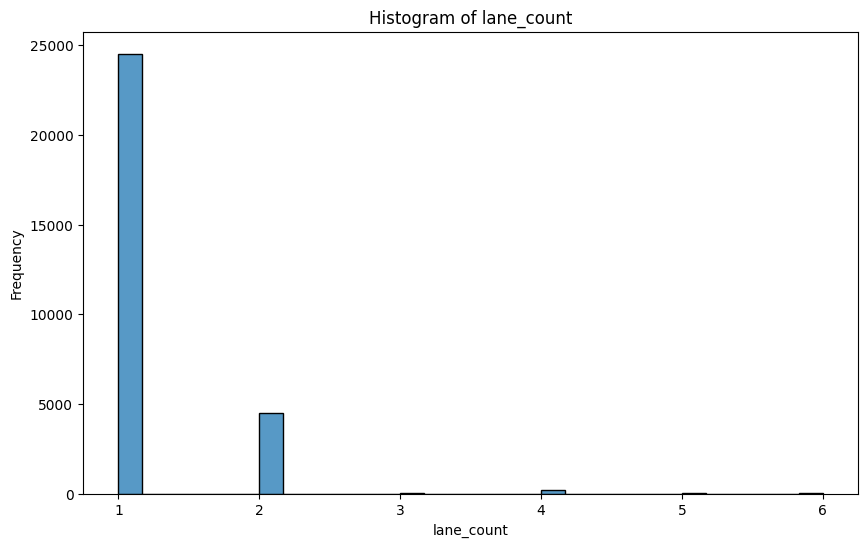

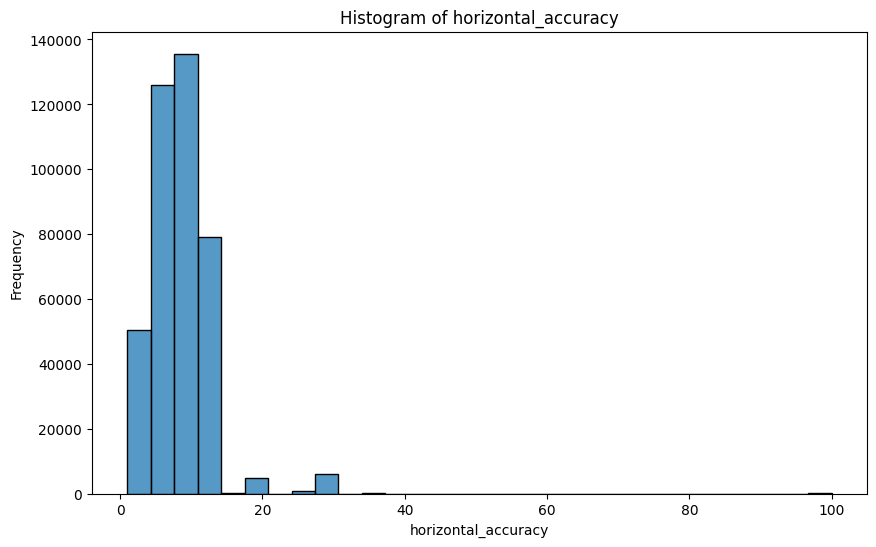

In [6]:
for column in['speed', 'lane_count', 'horizontal_accuracy']:
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column].dropna(), kde=False, bins=30) #bins means interval
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency') #data count
        plt.show()

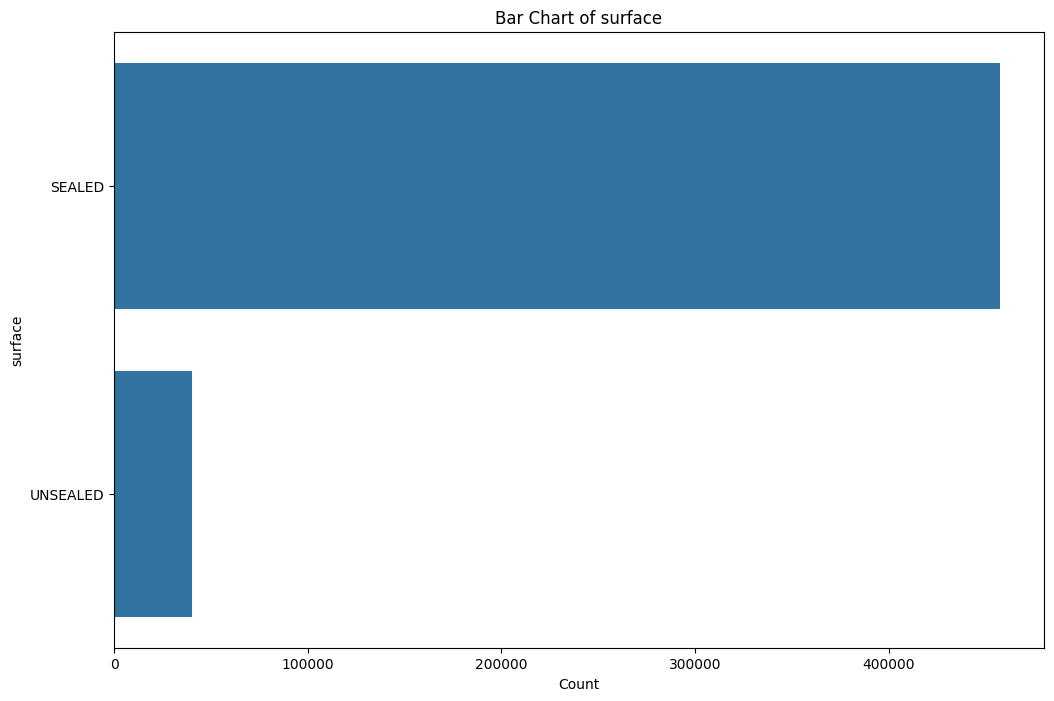

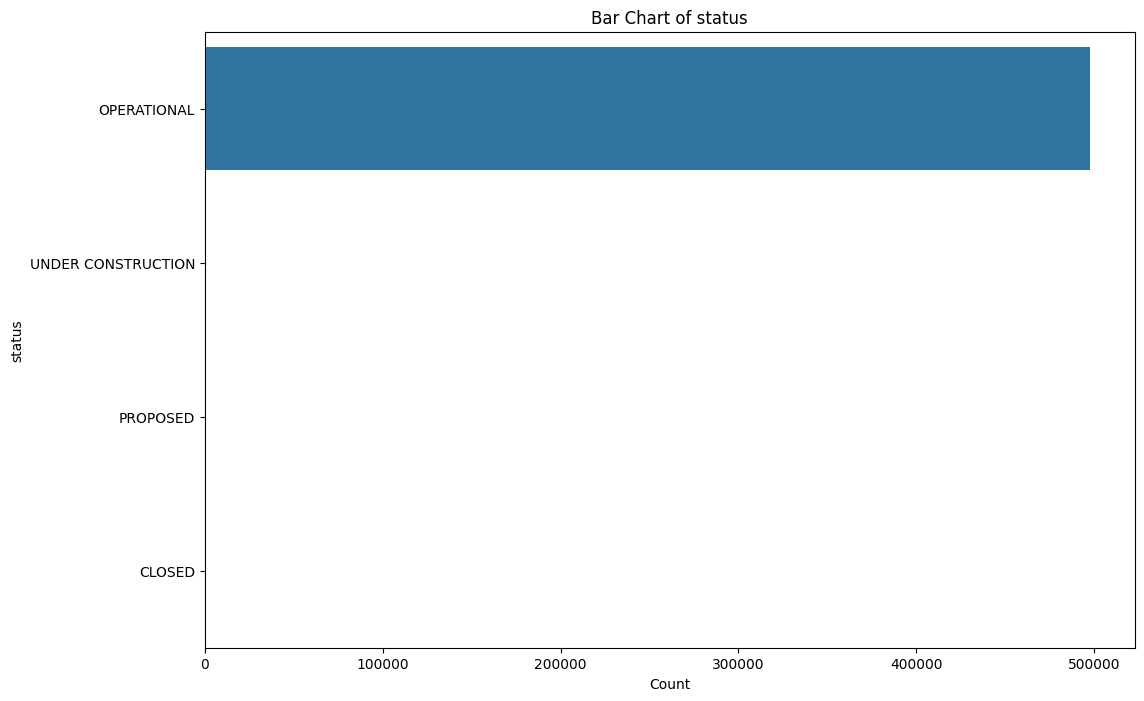

In [7]:
def plot_bar(column):
    if column in df.columns:
        plt.figure(figsize=(12, 8))
        sns.countplot(y=column, data=df, order = df[column].value_counts().index)
        plt.title(f'Bar Chart of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.show()

plot_bar('surface')
plot_bar('status')

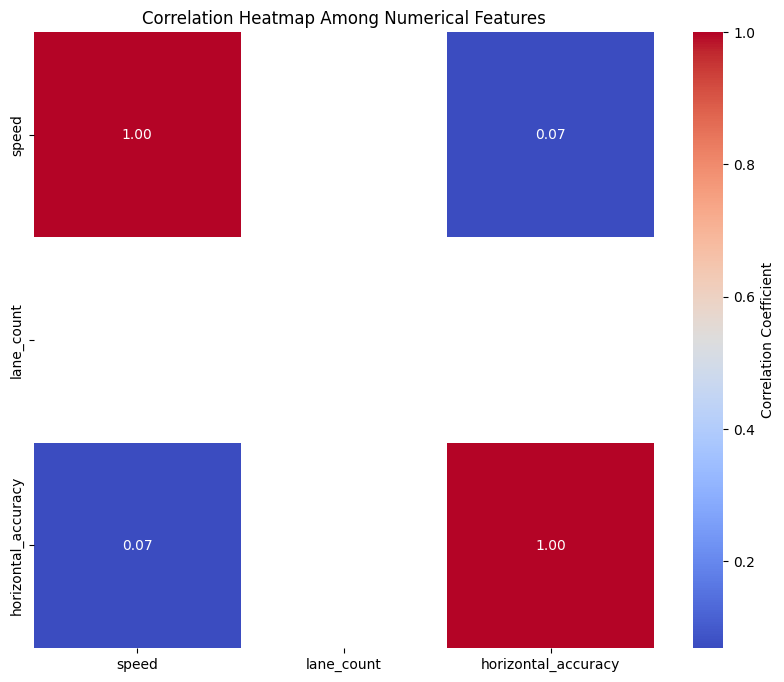

In [8]:
numerical_cols = ['speed', 'lane_count', 'horizontal_accuracy']  # Add or remove columns based on your dataset
df_numerical = df[numerical_cols].dropna()

corr = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap Among Numerical Features')
plt.show()


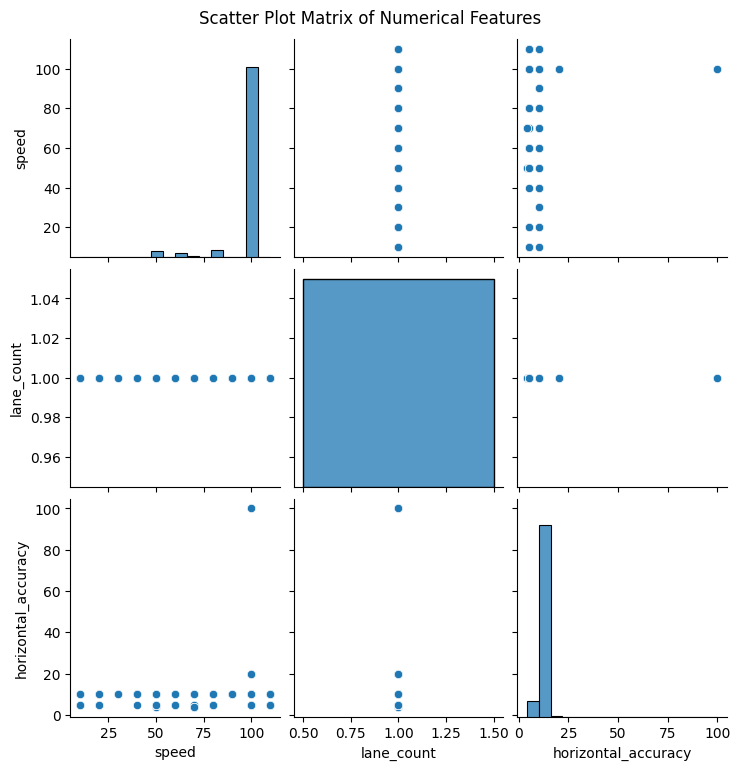

In [9]:
numerical_cols = ['speed', 'lane_count', 'horizontal_accuracy']
df_numerical = df[numerical_cols].dropna()

plot = sns.pairplot(df_numerical)
plot.fig.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

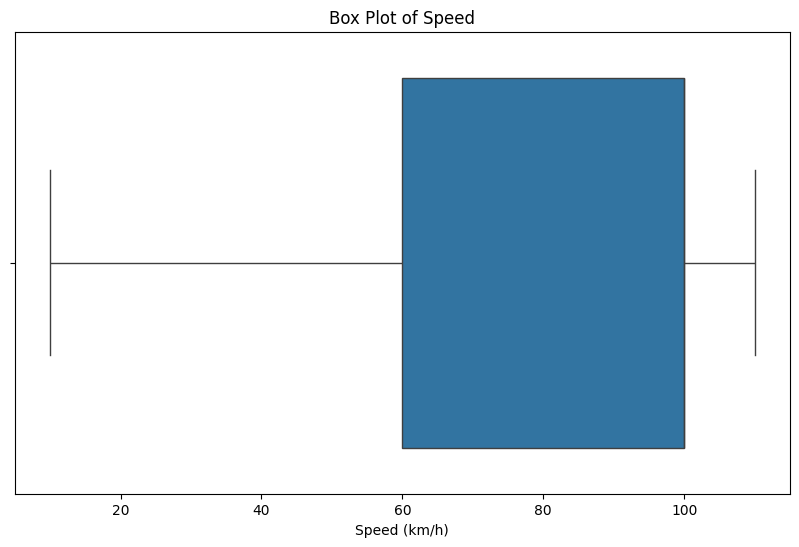

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['speed'])
plt.title('Box Plot of Speed')
plt.xlabel('Speed (km/h)')
plt.show()

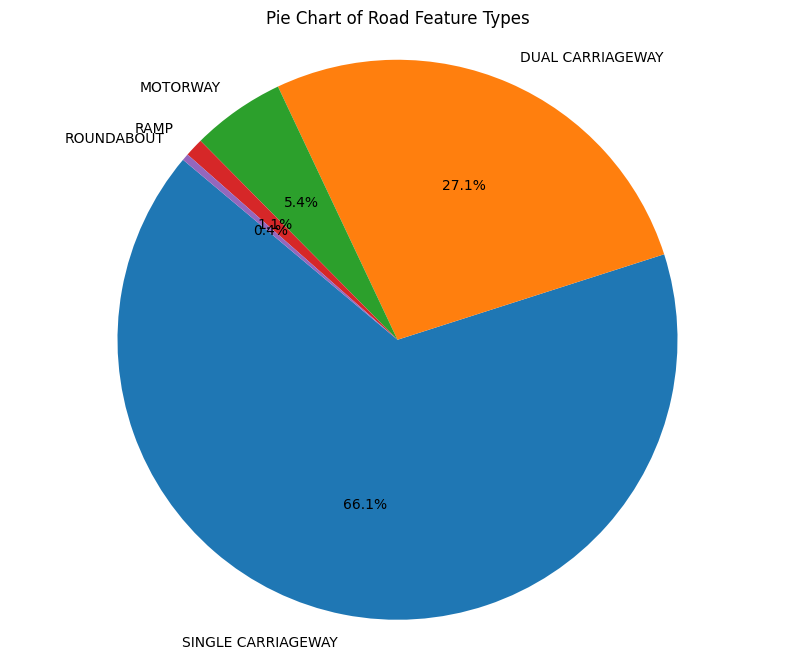

In [11]:
feature_counts = df['feature_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Road Feature Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

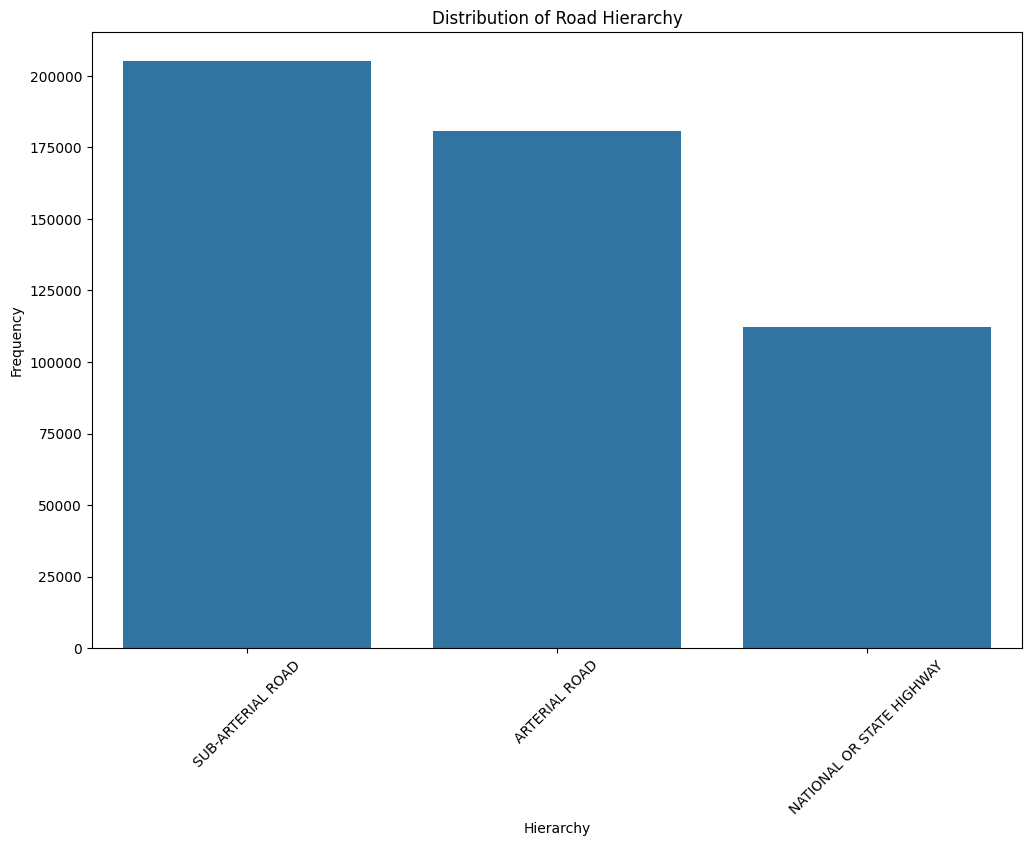

In [12]:
plt.figure(figsize=(12, 8))
hierarchy_counts = df['hierarchy'].value_counts()
sns.barplot(x=hierarchy_counts.index, y=hierarchy_counts.values)
plt.title('Distribution of Road Hierarchy')
plt.xlabel('Hierarchy')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

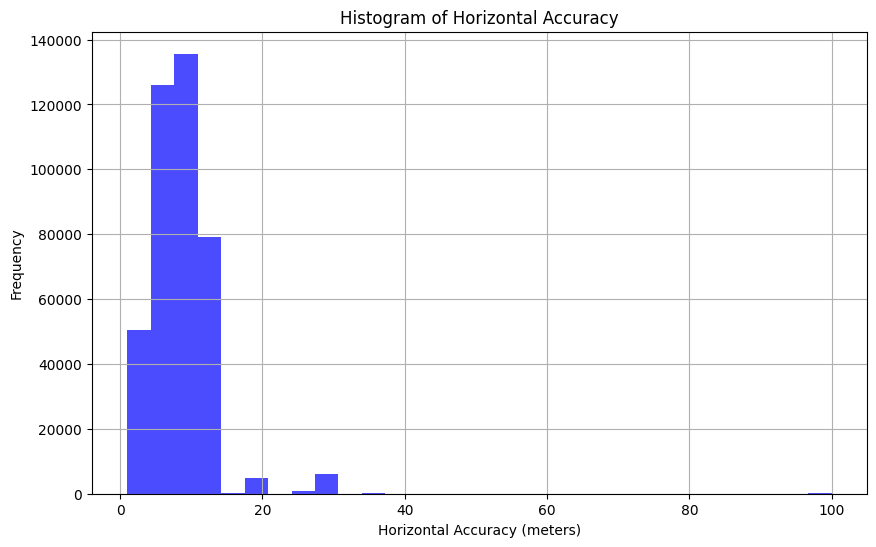

In [13]:
bin_edges = np.linspace(df['horizontal_accuracy'].min(), df['horizontal_accuracy'].max(), 31)

plt.figure(figsize=(10, 6))
plt.hist(df['horizontal_accuracy'].dropna(), bins=bin_edges, color='blue', alpha=0.7)
plt.title('Histogram of Horizontal Accuracy')
plt.xlabel('Horizontal Accuracy (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

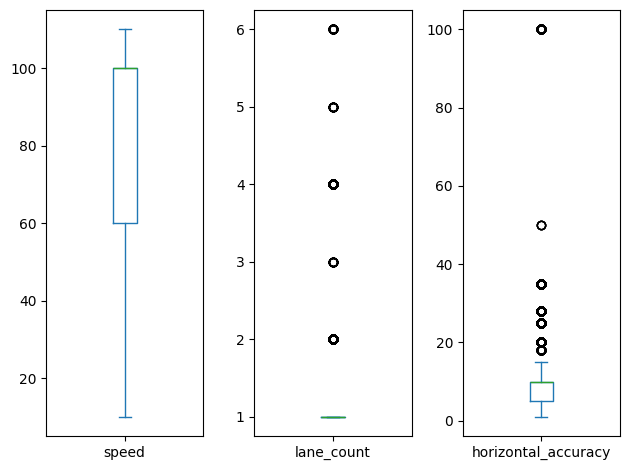

In [14]:
columns_to_plot = ['speed', 'lane_count', 'horizontal_accuracy']

# Create box plots for the selected columns
plt.figure(figsize=(12, 8))
df[columns_to_plot].plot(kind='box', subplots=True, layout=(1, 3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

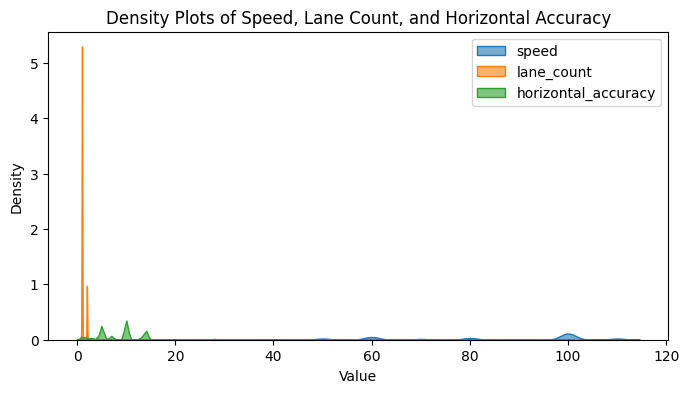

In [15]:
plt.figure(figsize=(8, 4))

numerical_cols = ['speed', 'lane_count', 'horizontal_accuracy']

for col in numerical_cols:
    if col in df.columns:
        sns.kdeplot(df[col].dropna(), fill=True, common_norm=False, alpha=0.6, label=f'{col}')


plt.title('Density Plots of Speed, Lane Count, and Horizontal Accuracy')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

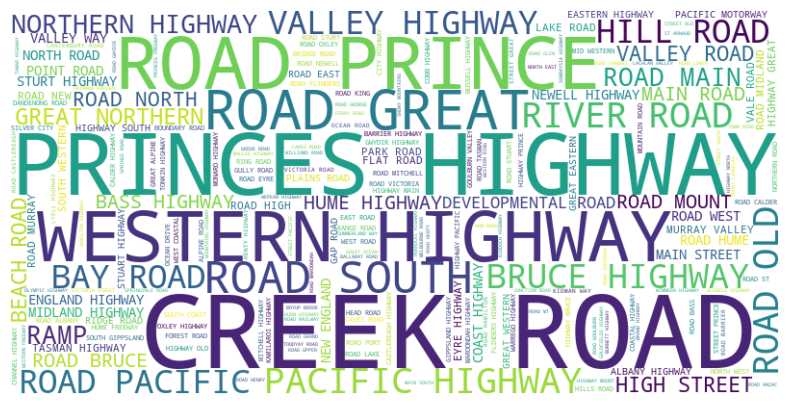

In [16]:
text = ' '.join(name for name in df['full_street_name'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

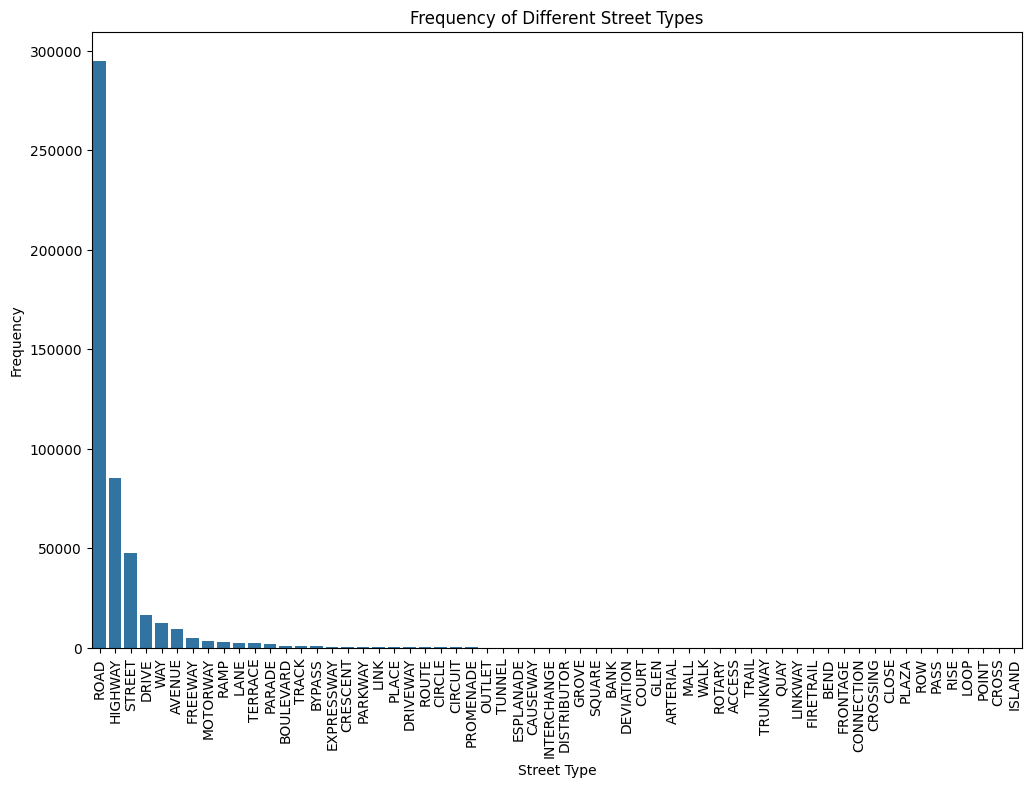

In [17]:
type_counts = df['street_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Frequency of Different Street Types')
plt.xlabel('Street Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  
plt.show()

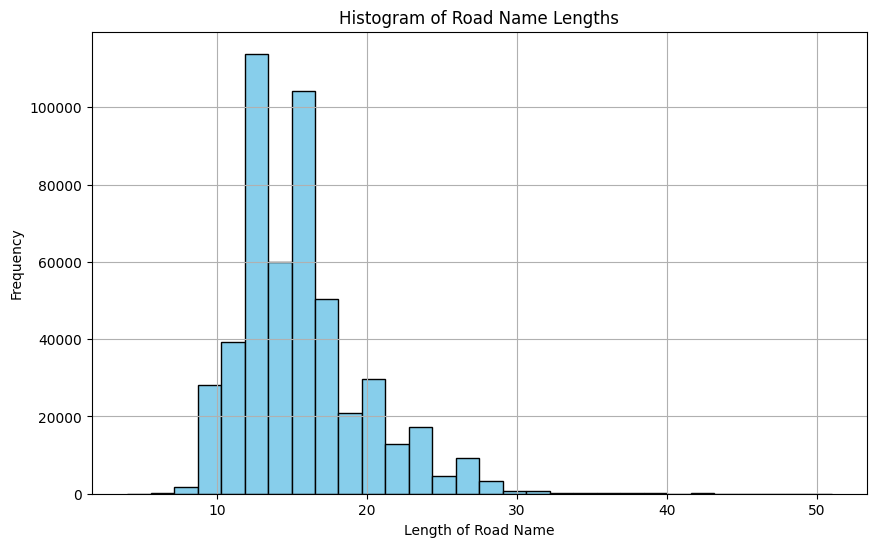

In [18]:
df['name_length'] = df['full_street_name'].dropna().apply(len)


plt.figure(figsize=(10, 6))
plt.hist(df['name_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Road Name Lengths')
plt.xlabel('Length of Road Name')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

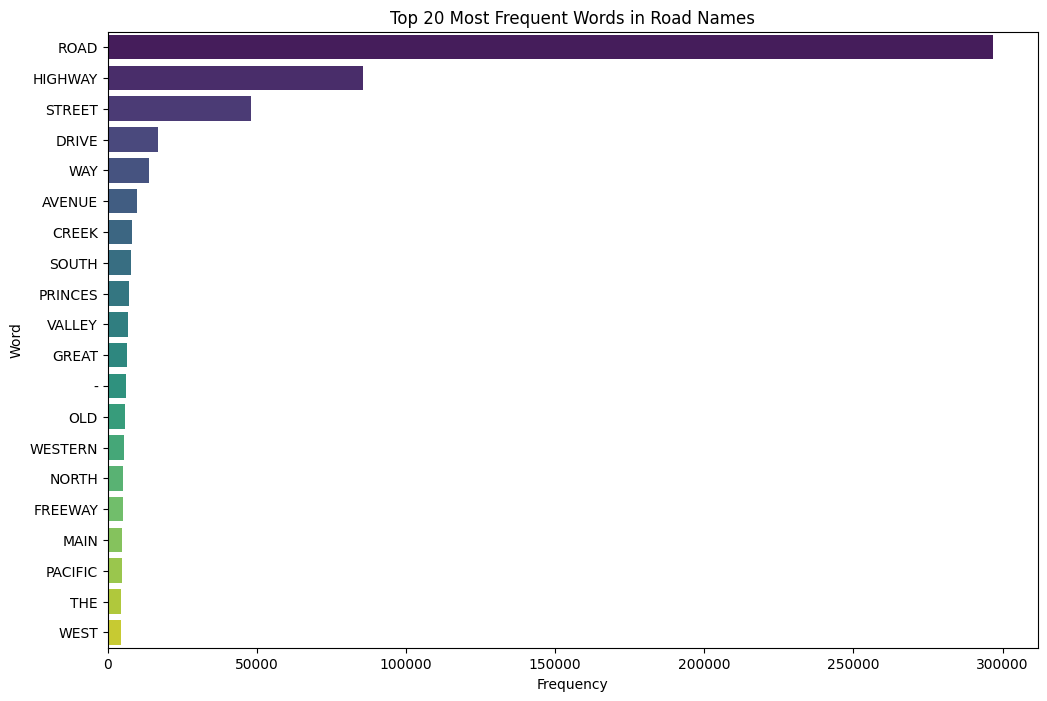

In [19]:
words = df['full_street_name'].dropna().str.split().explode()
word_counts = Counter(words)
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Road Names')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

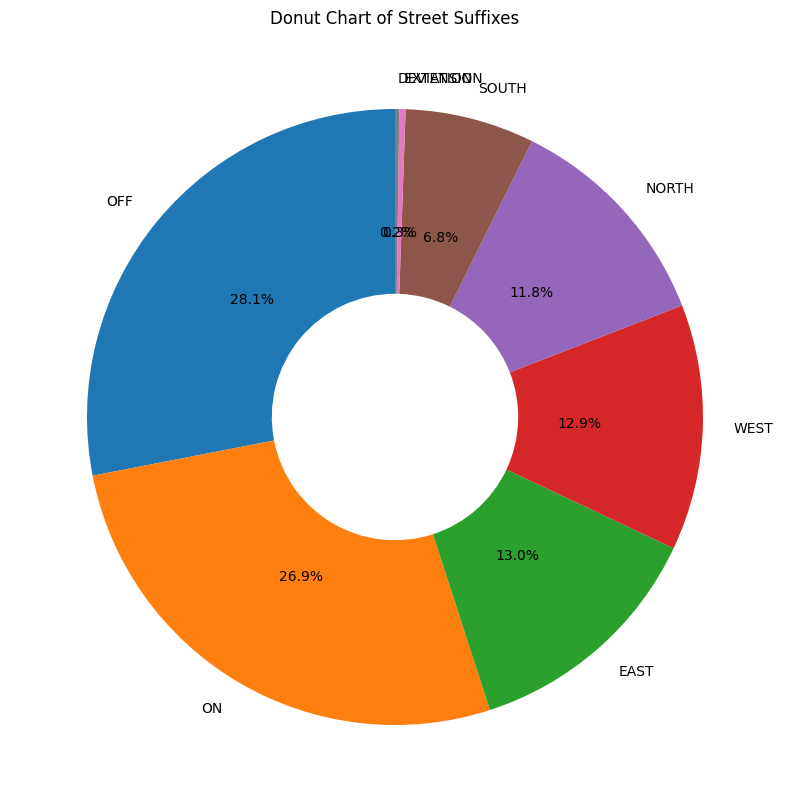

In [20]:
suffix_counts = df['street_suffix'].value_counts()

# Create a donut chart
plt.figure(figsize=(20, 10))
plt.pie(suffix_counts, labels=suffix_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.6})
plt.title('Donut Chart of Street Suffixes')
plt.show()

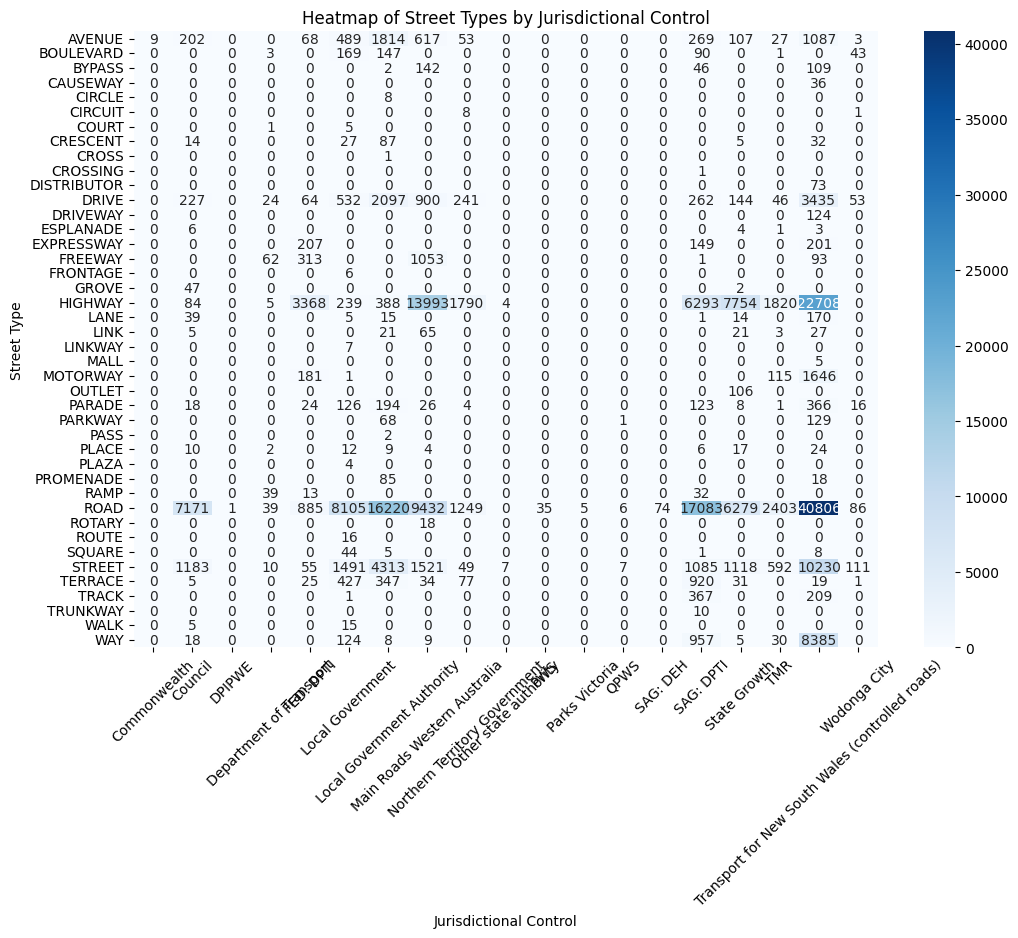

In [21]:
type_jurisdiction_ct = pd.crosstab(df['street_type'], df['jurisdiction_control'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(type_jurisdiction_ct, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Street Types by Jurisdictional Control')
plt.xlabel('Jurisdictional Control')
plt.ylabel('Street Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

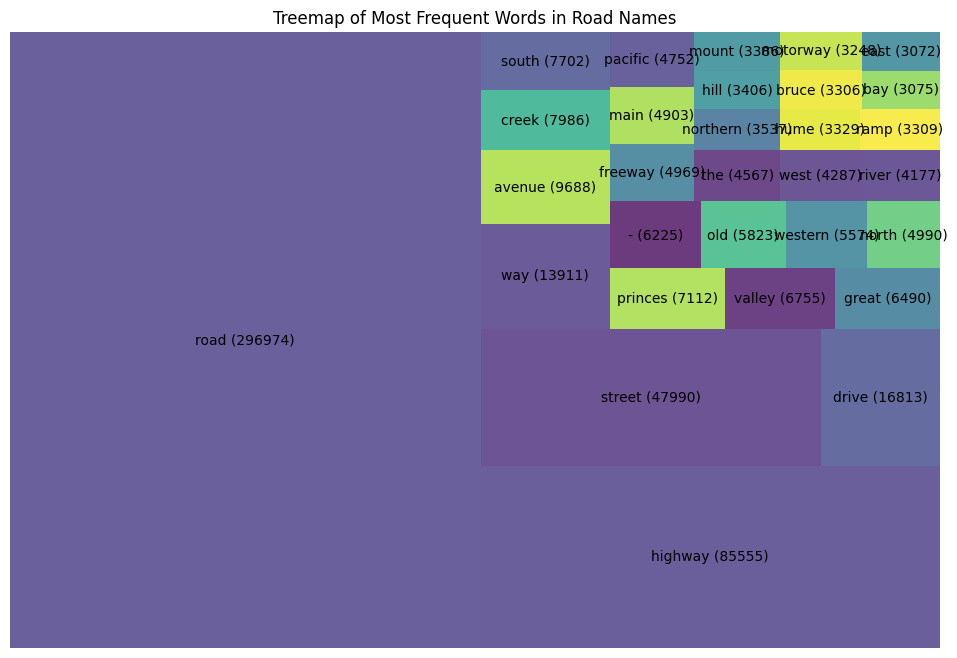

In [22]:
words = df['full_street_name'].dropna().str.lower().str.replace('[^\w\s]', '').str.split().explode()

word_counts = Counter(words)
labels = [f'{key} ({value})' for key, value in word_counts.most_common(30)]
sizes = [value for key, value in word_counts.most_common(30)]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title('Treemap of Most Frequent Words in Road Names')
plt.show()

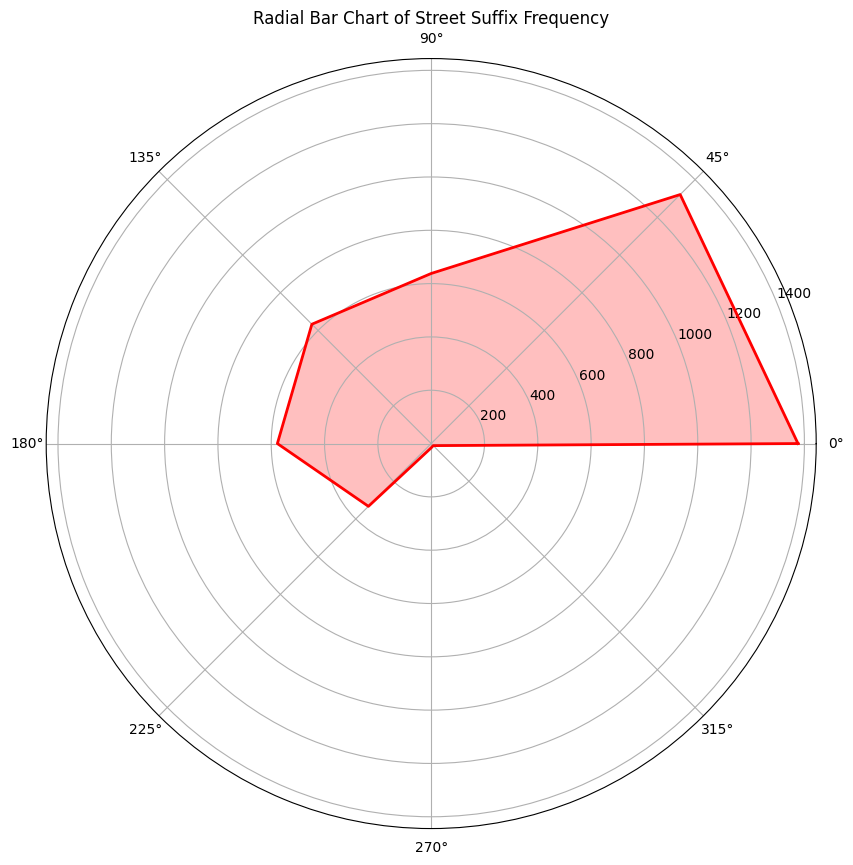

In [23]:
suffix_counts = df['street_suffix'].value_counts().nlargest(15)  # Limit to top 15 for clarity
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(suffix_counts), endpoint=False).tolist()
stats = suffix_counts.values
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', linewidth=2)  # Draw the outline of the radial bar


labels = list(suffix_counts.index)
labels += labels[:1]
ax.set_xticks(angles[:-1])
#ax.set_xticklabels(labels, rotation=45, ha="right")


plt.title('Radial Bar Chart of Street Suffix Frequency')
plt.show()

In [24]:
street_type_counts = df['street_type'].value_counts().reset_index()
street_type_counts.columns = ['street_type', 'count']
surface_counts = df['surface'].value_counts().reset_index()
surface_counts.columns = ['surface', 'count']

# Map 'street_type' and 'surface' to numerical IDs
street_type_ids = {name: i for i, name in enumerate(street_type_counts['street_type'])}
surface_ids = {name: i + len(street_type_ids) for i, name in enumerate(surface_counts['surface'])}

# Count connections between street_type and surface
connections = df.groupby(['street_type', 'surface']).size().reset_index(name='count')
connections['source'] = connections['street_type'].map(street_type_ids)
connections['target'] = connections['surface'].map(surface_ids)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(street_type_ids.keys()) + list(surface_ids.keys()),
        color="blue"
    ),
    link=dict(
        source=connections['source'], 
        target=connections['target'],
        value=connections['count']
    ))])

fig.update_layout(title_text='Sankey Diagram of Street Types to Surfaces', font_size=10)
fig.show()

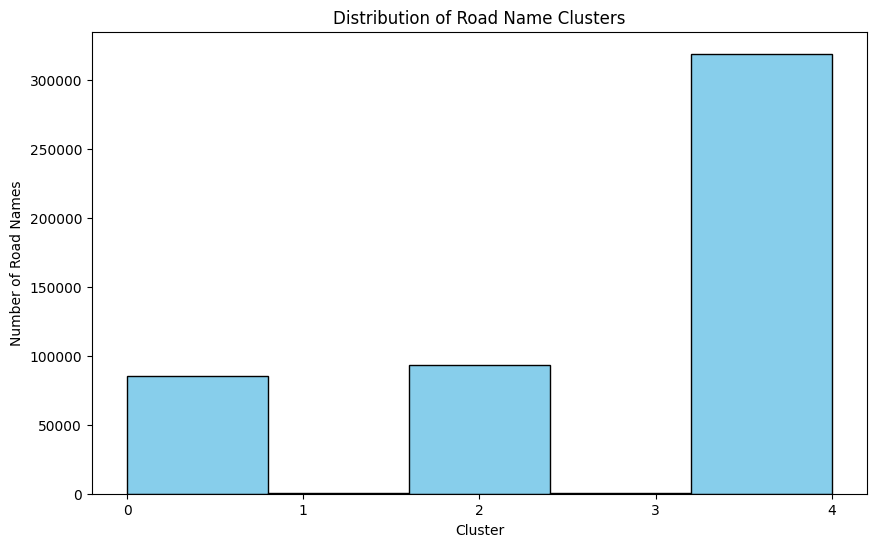

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare text data
text_data = df['full_street_name'].dropna()

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# KMeans clustering
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(clusters, bins=num_clusters, color='skyblue', edgecolor='black')
plt.title('Distribution of Road Name Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Road Names')
plt.xticks(range(num_clusters))
plt.show()


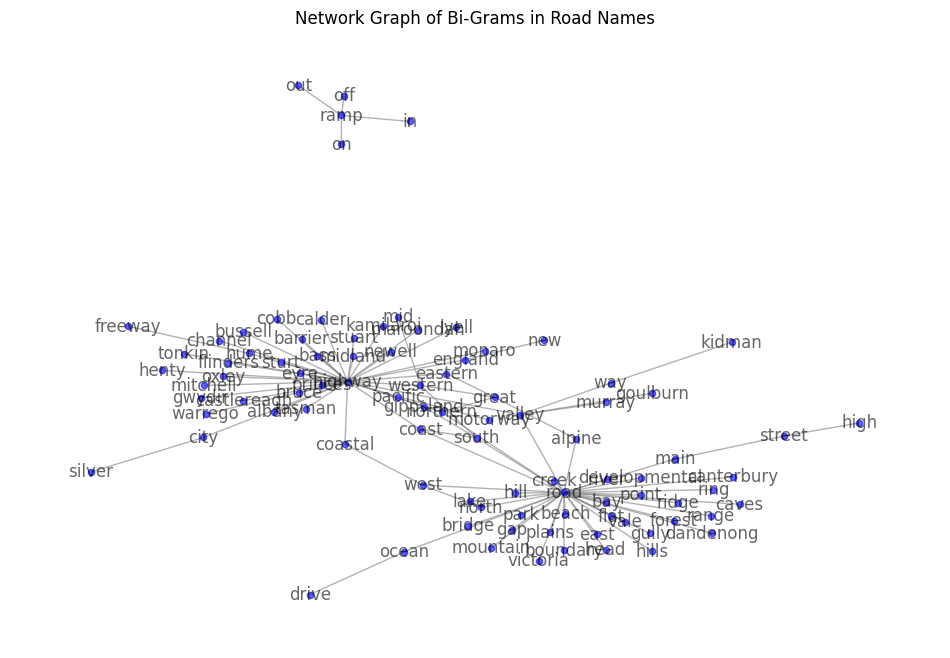

In [28]:
import re
def ngrams(string, n=2):
    string = string.lower()
    string = re.sub(r'[^\w\s]', '', string)  # Corrected line to use re
    tokens = string.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Create bi-grams and store in a new column
df['bi_grams'] = df['full_street_name'].dropna().apply(lambda x: ngrams(x))

# Flatten the list of bi-grams and count occurrences
bi_grams_flat = [item for sublist in df['bi_grams'].dropna() for item in sublist]  # Use dropna here
bi_gram_counts = pd.Series(bi_grams_flat).value_counts()

# Create a graph for the bi-grams
G = nx.Graph()
for bi_gram, count in islice(bi_gram_counts.items(), 100):
    word1, word2 = bi_gram.split()  # Fixed the typo here
    G.add_edge(word1, word2, weight=count)

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw_networkx(G, pos, with_labels=True, node_size=20, font_size=12, edge_color='gray', node_color='blue', alpha=0.6)
plt.title('Network Graph of Bi-Grams in Road Names')
plt.axis('off')
plt.show()

In [37]:
df.dropna(subset=['surface', 'speed', 'lane_count', 'feature_type', 'hierarchy'], inplace=True)

label_encoders={}
for column in ['feature_type', 'hierarchy']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['speed', 'lane_count', 'feature_type', 'hierarchy']]
y = df['full_street_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.64
                       precision    recall  f1-score   support

    ALEXANDRA TERRACE       1.00      0.50      0.67         2
       BARTON HIGHWAY       1.00      1.00      1.00         1
 BRISBANE WATER DRIVE       0.00      0.00      0.00         1
      BRUXNER HIGHWAY       0.00      0.00      0.00         1
      BULLINDA STREET       0.30      1.00      0.46         3
CENTRAL COAST HIGHWAY       1.00      1.00      1.00         1
        CESSNOCK ROAD       1.00      1.00      1.00         4
        KIRKWOOD ROAD       0.50      1.00      0.67         1
            MAIN ROAD       0.00      0.00      0.00         1
      PACIFIC HIGHWAY       0.60      1.00      0.75         3
     PEATS RIDGE ROAD       0.00      0.00      0.00         1
      PRINCES HIGHWAY       0.00      0.00      0.00         1
          SHIRLEY WAY       0.00      0.00      0.00         3
      SUGARWOOD DRIVE       1.00      1.00      1.00         2
         URANA STREET       0.00      0

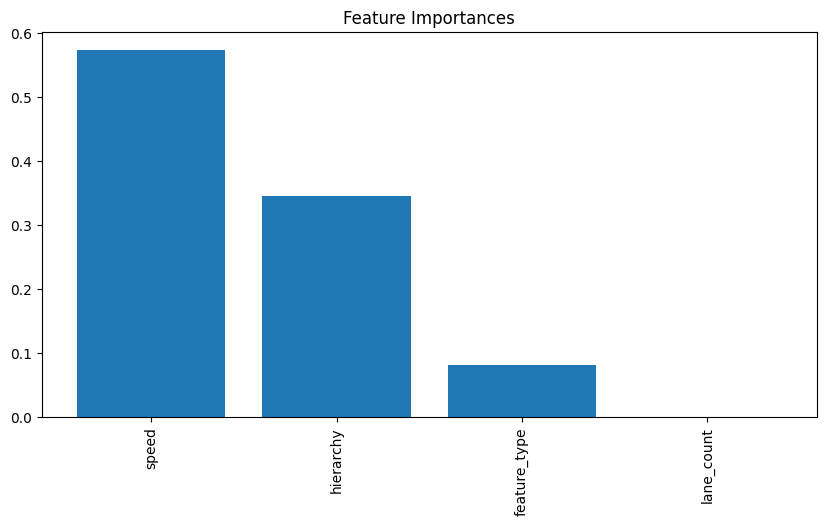

In [42]:
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

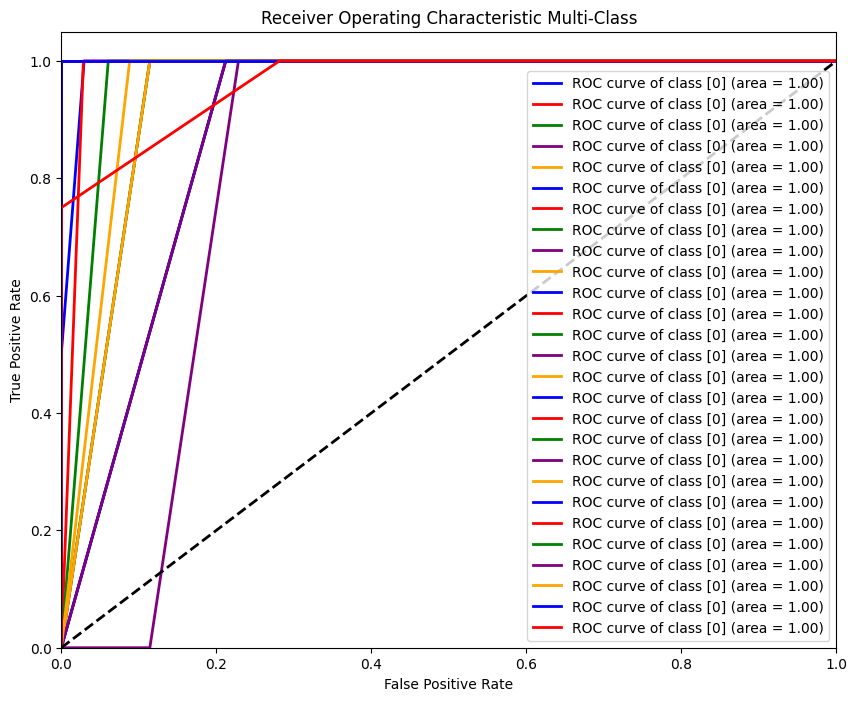

In [45]:
y_bin = label_binarize(y, classes=model.classes_)
n_classes = y_bin.shape[1]

classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == classifier.classes_[i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {[0]} (area = {1:0.2f})'.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Multi-Class')
plt.legend(loc='lower right')
plt.show()

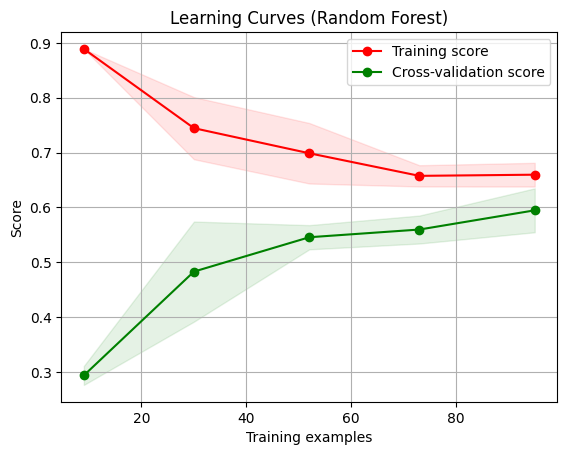

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(model, "Learning Curves (Random Forest)", X_train, y_train, cv=3)
plt.show()